[0 0 0 0 0 1 2 2 2 4 6 6 6 7 7 7 7 7 8 8 8 8 8 9 9]


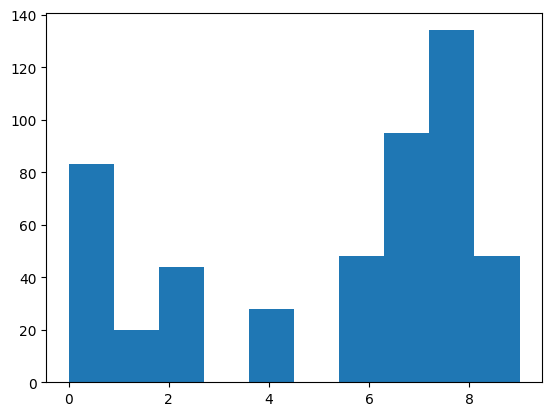

In [4]:
from OLS_Ridge import generate_data, polynomial_features, fit_polynomial, plot_mse_r2, mse_heatmap, run_experiments, plot_theta_heatmap
from GD import gradient_descent, stochastic_gradient_descent
from bias_variance import bias_variance_tradeoff
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


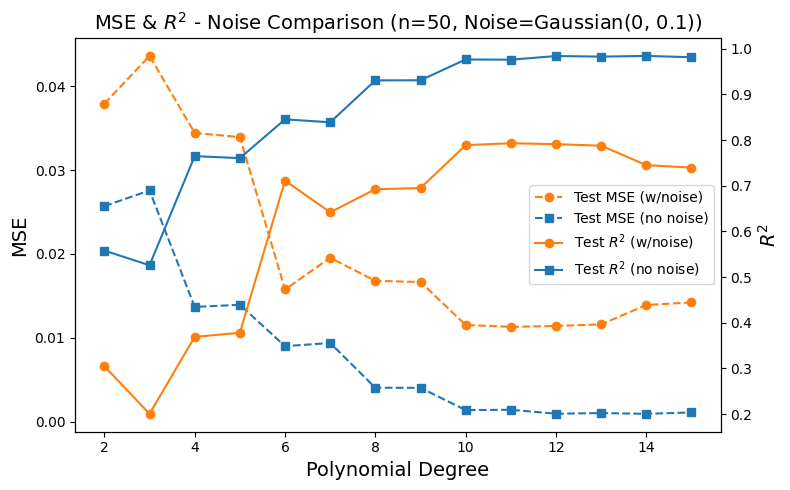

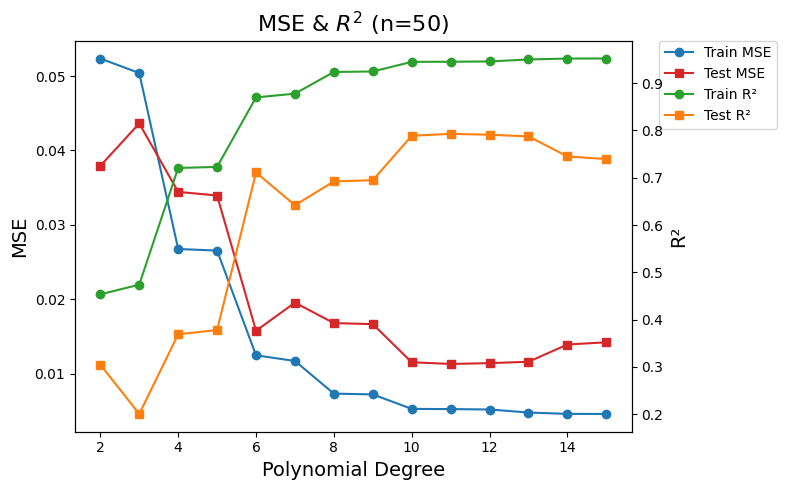

In [ ]:
""" 
Oridinary Least Squares 
Data Gathering
"""

"""
Noise comparison
"""

degrees = list(range(2, 16))
n_values = list(range(10,55,5))

results_by_n = {}
results_by_n2 = {}
n = 50

x, y = generate_data(n)
x2, y2 = generate_data(n, noise = False)
results_by_n[n] = run_experiments(x, y, degrees)
results_by_n2[n] = run_experiments(x2, y2, degrees)

def plot_mse_r2_comparison(results_by_n, results_by_n2, n, degrees):
    # If results are stored as a list in the same order as degrees:
    res_noise = results_by_n[n]
    res_clean = results_by_n2[n]

    # Extract metrics directly
    test_mse_noise = [res["test_mse"] for res in res_noise]
    test_r2_noise  = [res["test_r2"]  for res in res_noise]

    test_mse_clean = [res["test_mse"] for res in res_clean]
    test_r2_clean  = [res["test_r2"]  for res in res_clean]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(8,5))

    # Plot MSE on the left axis
    ax1.set_xlabel("Polynomial Degree", fontsize = 14)
    ax1.set_ylabel("MSE", fontsize = 14)
    ax1.plot(degrees, test_mse_noise, "o--",color="tab:orange", label="Test MSE (w/noise)")
    ax1.plot(degrees, test_mse_clean, "s--", color="tab:blue",label="Test MSE (no noise)")
    ax1.tick_params(axis="y")

    # Plot R2 on the right axis
    ax2 = ax1.twinx()
    ax2.set_ylabel("$R^2$", fontsize = 14)
    ax2.plot(degrees, test_r2_noise, "o-", color="tab:orange", label="Test $R^2$ (w/noise)")
    ax2.plot(degrees, test_r2_clean, "s-", color="tab:blue", label="Test $R^2$ (no noise)")
    ax2.tick_params(axis="y")

    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="center right")

    plt.title(f"MSE & $R^2$ - Noise Comparison (n=50, Noise=Gaussian(0, 0.1))", fontsize = 14)
    plt.tight_layout()
    plt.show()

plot_mse_r2_comparison(results_by_n, results_by_n2, n=n, degrees=degrees)

# Plotting for dataset with size n

plot_mse_r2(results_by_n[n], n)

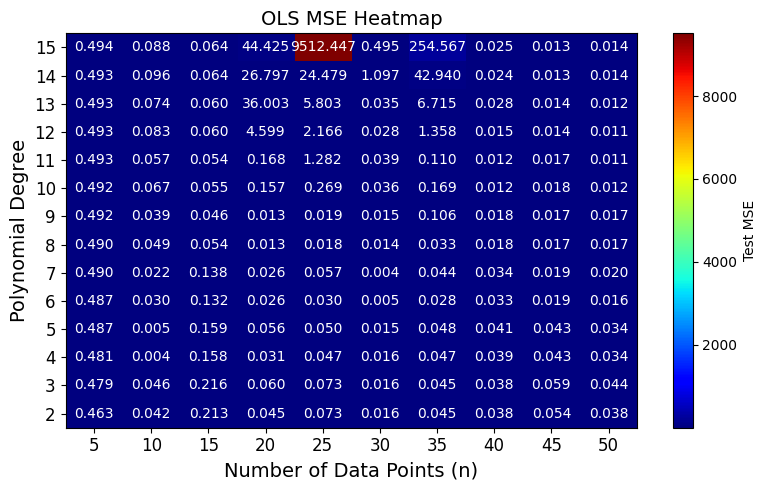

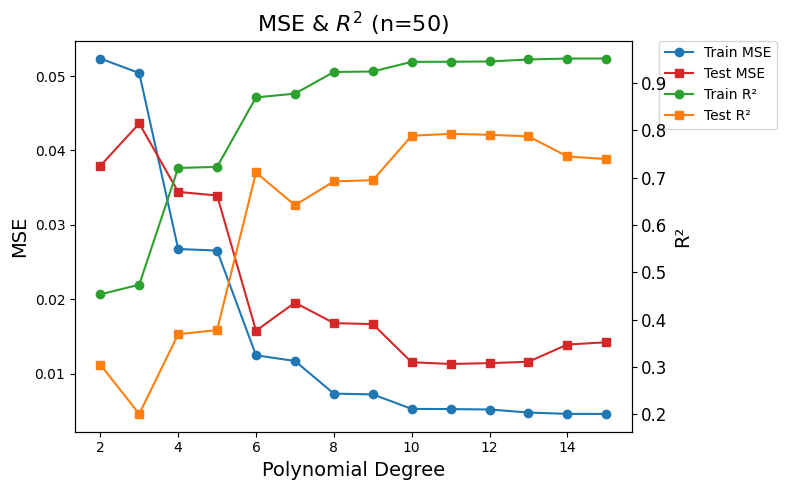

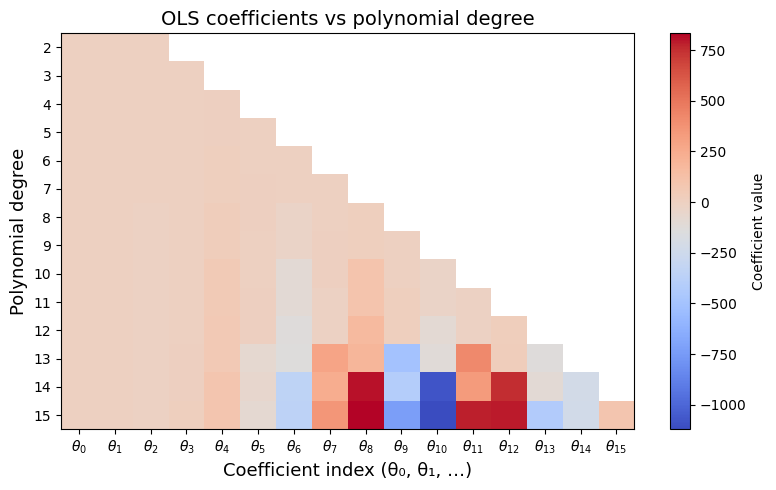

In [5]:
"""
Evaluating MSE on Runge's equation
"""

# Parameters
degrees = range(2, 16) 
n_values = range(5,55,5)  

# Dictionary to store results for each n
OLS_closedform = {}
for n in n_values:
    x, y = generate_data(n)                 # generate data
    OLS_closedform[n] = run_experiments(x, y, degrees)   # run OLS experiments

# Plot heatmap
mse_matrix = mse_heatmap(OLS_closedform, degrees)

# Choose a value of n within the range of n_values
n = 50
thetas = [r["theta"] for r in OLS_closedform[n]]
degrees = [r["degree"] for r in OLS_closedform[n]]
plot_mse_r2(OLS_closedform[n], n)
plot_theta_heatmap(thetas, degrees)

In [ ]:
""" 
Replacing analytical expression with Gradient Descent
"""

# Dictionary to store results for each n
# n_iter = 200 due 
OLS_GD = {}
for n in n_values:
    x, y = generate_data(n) 
    OLS_GD[n] = run_experiments(x, y, degrees, GD = True, n_iter =200)




In [ ]:
""" 
Replacing analytical expression with Stochastic Gradient Descent
"""
# Dictionary to store results for each n
# n_iter = 400 due to getting results faster
OLS_SGD = {}
for n in n_values:
    x, y = generate_data(n) 
    OLS_SGD[n] = run_experiments(x, y, degrees, SGD = True, batch_size=5 )



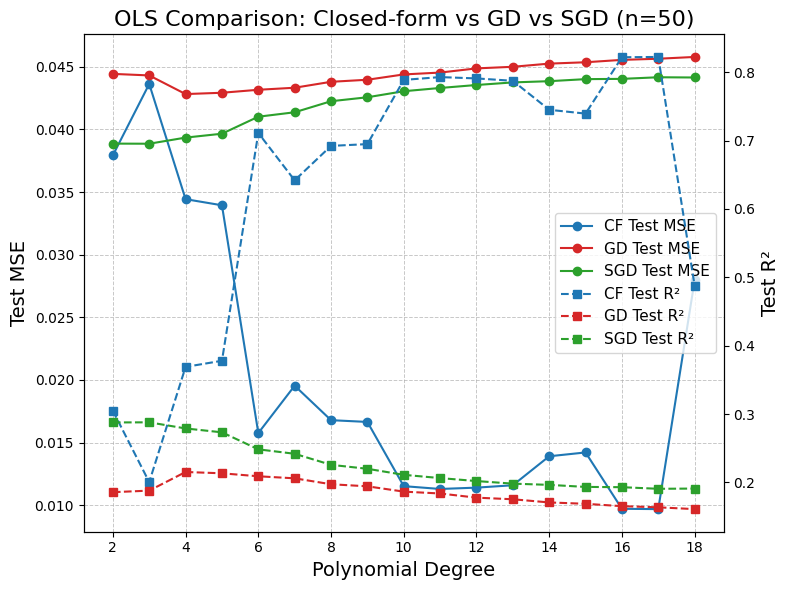

In [ ]:
""""
Comparing OLS w/GD and without
"""
n = 50  # same n used for OLS_GD

gd_results = OLS_GD[n]
cf_results = OLS_closedform[n]
sgd_results = OLS_SGD[n]

degrees = [r["degree"] for r in gd_results]

# Extract metrics
gd_mse = [r["test_mse"] for r in gd_results]
gd_r2  = [r["test_r2"]  for r in gd_results]
sgd_mse = [r["test_mse"] for r in sgd_results]
sgd_r2  = [r["test_r2"]  for r in sgd_results]
cf_mse = [r["test_mse"] for r in cf_results]
cf_r2  = [r["test_r2"]  for r in cf_results]



fig, ax1 = plt.subplots(figsize=(8,6))


ax1.set_xlabel("Polynomial Degree", fontsize=14)
ax1.set_ylabel("Test MSE", fontsize=14)

ax1.plot(degrees, cf_mse, color="tab:blue", linestyle='-', marker='o', label="CF Test MSE")
ax1.plot(degrees, gd_mse, color="tab:red", linestyle='-', marker='o', label="GD Test MSE")
ax1.plot(degrees, sgd_mse, color="tab:green", linestyle='-', marker='o', label="SGD Test MSE")
ax1.tick_params(axis='y', labelcolor="black")


ax2 = ax1.twinx()
ax2.set_ylabel("Test R²", fontsize=14)

ax2.plot(degrees, cf_r2, color="tab:blue", linestyle='--', marker='s', label="CF Test R²")
ax2.plot(degrees, gd_r2, color="tab:red", linestyle='--', marker='s', label="GD Test R²")
ax2.plot(degrees, sgd_r2, color="tab:green", linestyle='--', marker='s', label="SGD Test R²")
ax2.tick_params(axis='y', labelcolor="black")


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="center right", fontsize=11)


plt.title(f"OLS Comparison: Closed-form vs GD vs SGD (n={n})", fontsize=16)
ax1.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()



### OLS Bias variance tradeoff

In [ ]:
import importlib
import OLS_Ridge
importlib.reload(OLS_Ridge)


<module 'OLS_Ridge' from 'c:\\Skole\\Anvendt dataanalyse og Maskinlæring\\Project1\\Codes\\OLS_Ridge.py'>

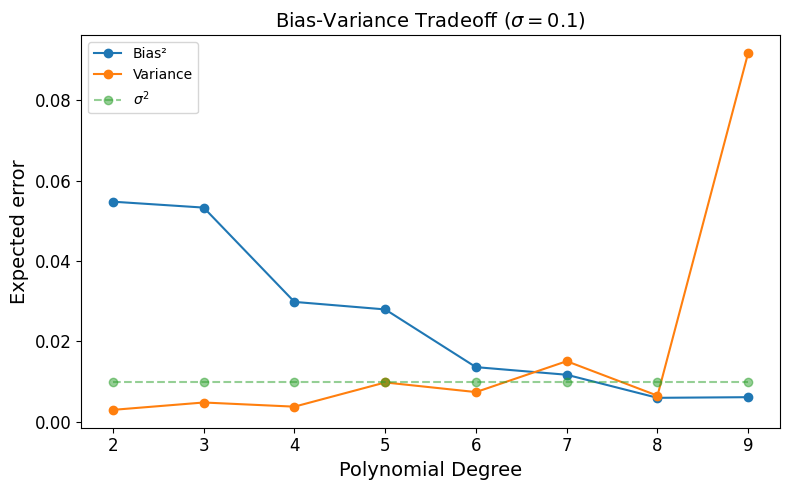

In [ ]:
n= 50
x, y = generate_data(n)
degrees = np.arange(2, 10)


biases, variances, mses = bias_variance_tradeoff(x, y, degrees, bootstraps=300)
MSE_in_theory = np.array(biases) + np.array(variances)
sigma = np.full(len(degrees), 0.01)

plt.figure(figsize=(8,5))
plt.plot(degrees, biases, label="Bias²", marker='o')
plt.plot(degrees, variances, label="Variance", marker='o')
#plt.plot(degrees, mses, label="MSE", marker='o', linestyle='--', alpha=0.5) 
plt.plot(degrees, sigma, label=rf"$\sigma^2$", marker='o', linestyle='--', alpha=0.5) 

plt.xlabel("Polynomial Degree", fontsize=14)
plt.ylabel("Expected error", fontsize=14)
plt.title(rf"Bias-Variance Tradeoff ($\sigma = 0.1$)", fontsize=14)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

